  #                             Проект: Обучение с учителем: качество модели. 

##   Описание проекта ##

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и нам предстоит побыть в роли стажёра в этом отделе. 
Итак, нашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

Часть 1. Изучение общей информации:
1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.
2. Нахождение и ликвидация пропусков.

Часть 2. Подготовка данных:
1. Приведение данных к нужным типам.
2. Нахождение и исправление аномалий и ошибок.

Изучение файлов с данными, получение общей информации, загрузка библиотек.

In [1]:
!pip install scikit-learn==1.1.3
import re
import pandas as pd
import numpy as np
import sklearn
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
!pip install phik -q
import phik
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")
!pip install shap -q
import shap
from sklearn.datasets import load_iris
from sklearn import tree


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 69.5 MB/s eta 0:00:00:00:0100:01
    matplotlib-inline (<0.2.0appnope,>=0.1.0) ; platform_system == "Darwin"
                      ~~~~~~~~^
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
    matplotlib-inline (<0.2.0appnope,>=0.1.0) ; platform_system == "Darwin"
                      ~~~~~~~~^
    matplotlib-inline (<0.2.0appnope,>=0.1.0) ; platform_system == "Darwin"
                      ~~~~~~~~^


In [2]:
df_market = pd.read_csv('/datasets/market_file.csv', sep=',', decimal='.')
df_market_money = pd.read_csv('/datasets/market_money.csv', sep=',', decimal='.')
df_market_time = pd.read_csv('/datasets/market_time.csv', sep=',', decimal='.')
df_money = pd.read_csv('/datasets/money.csv', sep=';', decimal='.')



<div> class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично. Импортировали требуемые для анализа библиотеки и загрузили данные. Сейчас посмотрим на их состояние и если всё ОК, сможем приступать к построению моделей....

p.s. при установке дополнительных библиотек (через ! pip install ...) можно использовать полезный ключ **-q** (он "подавит" служебные сообщения об установке, которых может быть достаточно много - вплоть до нескольких экранов прокрутки)

p.p.s. При считывании данных из файла здорово перестраховывать себя от ошибок, связанных, например, с неверным указанием пути к файлу. А иногда бывает, что работаешь с файлом локально, выгружаешь его на сервер, ожидая, что он будет принимать данные, которые лежат на том же сервере, а код падает с ошибкой, потому что путь к файлу не поменялся с локального на серверный.
    
Для этого, например, можно использовать конструкцию `try-except`: сначала пробуешь локальный путь, при возникновении ошибки используется серверный путь (подробнее можешь почитать тут: https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html).
    
Но еще лучше использовать библиотеку `os` - её использование позволит тебе проверять существование указанных директорий (что может быть актуально при одновременной работа на локальном и сетевом окружении) и загружать данные из существующей директории, избегая ошибок. Как пример:
    
    import os

    pth1 = '/folder_1/data.csv'
    pth2 = '/folder_2/data.csv'
    
    if os.path.exists(pth1):
        query_1 = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        query_1 = pd.read_csv(pth2)
    else:
        print('Something is wrong')

Ещё на этапе считывания данных можно спарсить дату: за это действие отвечает параметр `parse_dates` метода `read_csv()`, в него нужно передать список с названием полей-дат, и в большинстве случаев дата будет корректно преобразована в нужный формат сразу:)
Также на этапе считывания данных задать индекс-столбец- за это действие отвечает параметр `index_col`.
</div>

**Выведем 5 первых строк каждой таблицы и изучим их**

In [3]:
df_market.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [4]:
df_market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [5]:
df_market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [6]:
df_money.head(5)

,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


**Изучим общую информацию о каждой таблице с помощью метода info()**

In [7]:
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [8]:
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [9]:
df_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [10]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


**Приведем назания колонок к нижнему регистру и затем к змеиному**

In [11]:
dfs = [
    df_market,
    df_market_money,
    df_market_time,
    df_money
]
for df in dfs:
    df.columns = df.columns.str.lower()
dfs


[          id покупательская активность тип сервиса разрешить сообщать  \
 0     215348                 Снизилась     премиум                 да   
 1     215349                 Снизилась     премиум                 да   
 2     215350                 Снизилась   стандартт                нет   
 3     215351                 Снизилась   стандартт                 да   
 4     215352                 Снизилась   стандартт                нет   
 ...      ...                       ...         ...                ...   
 1295  216643           Прежний уровень    стандарт                 да   
 1296  216644           Прежний уровень    стандарт                нет   
 1297  216645           Прежний уровень    стандарт                 да   
 1298  216646           Прежний уровень    стандарт                 да   
 1299  216647           Прежний уровень     премиум                 да   
 
       маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
 0                    3.4                    

In [12]:
dfs = [
    df_market,
    df_market_money,
    df_market_time,
    df_money
]
for df in dfs:
    df.columns = df.columns.str.replace(' ', '_')
print(dfs)


[          id покупательская_активность тип_сервиса разрешить_сообщать  \
0     215348                 Снизилась     премиум                 да   
1     215349                 Снизилась     премиум                 да   
2     215350                 Снизилась   стандартт                нет   
3     215351                 Снизилась   стандартт                 да   
4     215352                 Снизилась   стандартт                нет   
...      ...                       ...         ...                ...   
1295  216643           Прежний уровень    стандарт                 да   
1296  216644           Прежний уровень    стандарт                нет   
1297  216645           Прежний уровень    стандарт                 да   
1298  216646           Прежний уровень    стандарт                 да   
1299  216647           Прежний уровень     премиум                 да   

      маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
0                    3.4                     5           1

### Нахождение и ликвидация пропусков ###

**Посмотри возможные пропуски методом isna()**

In [13]:
df_market.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

In [14]:
df_market_money.isna().sum()

id         0
период     0
выручка    0
dtype: int64

In [15]:
df_market_time.isna().sum()

id        0
период    0
минут     0
dtype: int64

In [16]:
df_money.isna().sum()

id         0
прибыль    0
dtype: int64

**Провели проверку на наличие пропусков. Пропусков не обнаружено**

## Подготовка данных ##

### Применение данных к нужным типам ###

In [17]:
df_market.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [18]:
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

**приведем тип данных колонки 'акционные покупки' к int**

**Тут видим, что тип данных стоит правильно**

In [19]:
df_market_money.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [20]:
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


**Тут тоже ничего не меняем**

In [21]:
df_market_time.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [22]:
df_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


**Оставляем все как есть**

In [23]:
df_money.head()

,id,прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


In [24]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


In [25]:
df_money['прибыль'] = df_money['прибыль'].str.replace(',', '.')
df_money.head()

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [26]:
df_money['прибыль'] = pd.to_numeric(df_money['прибыль']).astype('float')

In [27]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


### Нахождение аномалий и ошибок ###

**Найдем дубликаты у каждой таблицы**

In [28]:
dfs = [
    df_market,
    df_market_money,
    df_market_time,
    df_money
]
df_duplicated_counts = {}
for i, df in enumerate(dfs):
    df_duplicated_counts[f"df_{i}"] = df.duplicated().sum()
for df_name, count in df_duplicated_counts.items():
    print(f'Количество дубликатов в {df_name}:{count}')

Количество дубликатов в df_0:0
Количество дубликатов в df_1:0
Количество дубликатов в df_2:0
Количество дубликатов в df_3:0


**Видим, что дубликатов нет**

In [29]:
df_market['маркет_актив_6_мес'].unique()

array([3.4, 4.4, 4.9, 3.2, 5.1, 3.3, 4.7, 4.2, 3.9, 4.6, 4.3, 3.8, 2.7,
       4.8, 2.9, 3. , 2.4, 1.7, 3.6, 4. , 1.5, 3.5, 4.1, 3.1, 1.4, 0.9,
       5.6, 2.6, 5.5, 5.2, 5.8, 5. , 5.4, 5.7, 5.3, 3.7, 6.3, 6.6, 4.5,
       6.1, 5.9])

**В столце 'тип сервиса' орфограическая ошибка в типе - стандартт. Изменим данню ошибку**

In [30]:
df_market.loc[df_market['тип_сервиса'] == 'стандартт', 'тип_сервиса'] = 'стандарт'

In [31]:
df_market['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

**В таблице df_market_time есть ошибка в столбце 'период' в слове 'предыдцщий'**

**посмотрим на таблицу времени покупок**

In [32]:
df_market_time

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
...,...,...,...
2595,216645,текущий_месяц,18
2596,216646,предыдцщий_месяц,18
2597,216646,текущий_месяц,7
2598,216647,текущий_месяц,10


In [33]:
df_market_time.loc[df_market_time['период'] == 'предыдцщий_месяц', 'период'] = 'предыдущий_месяц'
df_market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Вывод: В ходе выполнения 1 и 2 задачи исследования были осуществлены следующие действия: 
1. Загрузили нужные библиотеки
2. Изучили общую информацию о данных
3. Привели названия колонок к нижнему и змеиному регистру
4. Привели данные к нужному типу
5. Провели проверку на пропуски и дубликаты. 
6. Нашли ошибки в данных. Например в столбце 'тип_сервиса' таблицы df_market заменили значения 'стандартт' на 'стандарт'
7. Нашли и исправили ошибки у таблицы df_market в столбце 'маркет_актив6мес' = 3.4. Это на самом деле 34 коммуникации а не 3.4.
   Домножили каждое значение столбца на 10.

## Исследовательский анализ данных ##

**Исследуем каждую таблицу по отдельности с помощью метода describe()**

In [34]:
df_market.describe()


,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


**В данной таблице аномалий нет**

In [35]:
df_market_money.describe()

,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


**Тут видим, что среднее сильно отличается от максимального значения. Скорее всего есть выбросы. построим график для наглядности**

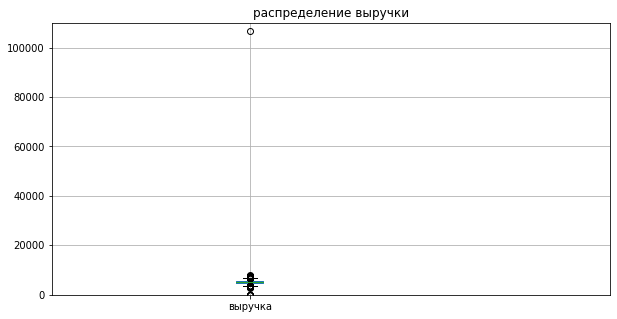

In [36]:
df_market_money.drop(['id'], axis=1).boxplot(figsize=(10, 5), grid=True)
plt.xlim(-0.1, 3)
plt.ylim(-100, 110000)
plt.title('распределение выручки')
plt.show()

In [37]:
df_market_money['выручка'].sort_values(ascending=False)

98      106862.2
435       7799.4
262       7605.3
1481      7557.0
2388      7547.8
          ...   
34           0.0
29           0.0
28           0.0
2            0.0
0            0.0
Name: выручка, Length: 3900, dtype: float64

**Предположение насчет выброса подтвердились. Скорее всего это чья то ошибка при вводе данных в таблицу. Наверняка это значение не 106862 а 10686.2. Поэтому разделим это число на 10**

In [38]:
df_market_money[df_market_money['выручка'] == '106862.2'] / 10
df_market_money['выручка'].sort_values(ascending=False)

98      106862.2
435       7799.4
262       7605.3
1481      7557.0
2388      7547.8
          ...   
34           0.0
29           0.0
28           0.0
2            0.0
0            0.0
Name: выручка, Length: 3900, dtype: float64

In [39]:
df_market_time.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


**Тут все нормально**

In [40]:
df_money.describe()

,id,прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


**Ошибок и выбросов нет**

**Построим гистограммы для количественных переменных**

In [41]:
df_market_num_columns = df_market[['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит']]

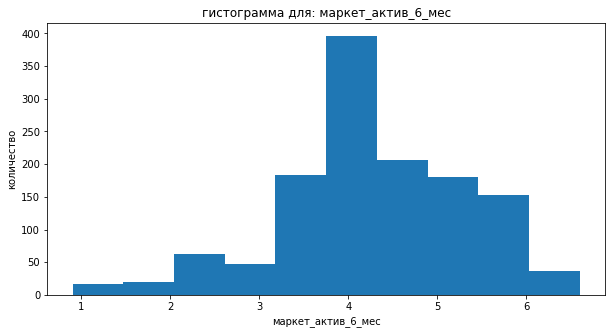

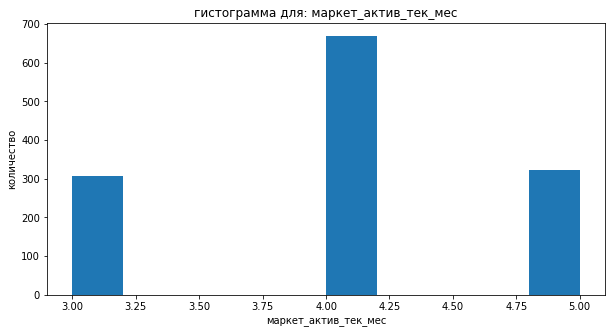

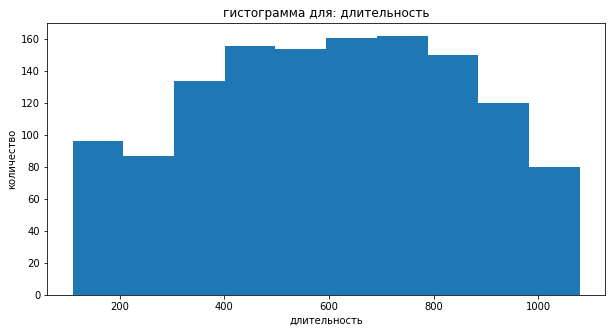

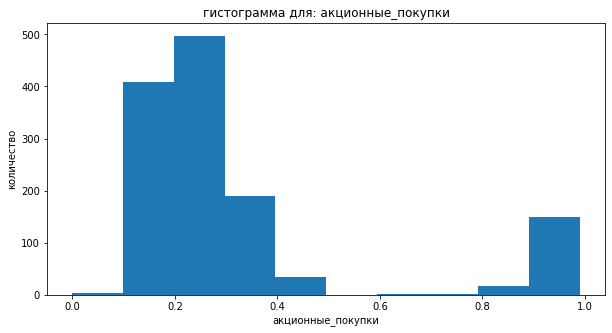

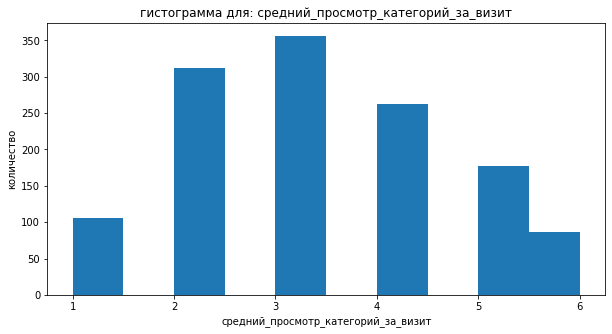

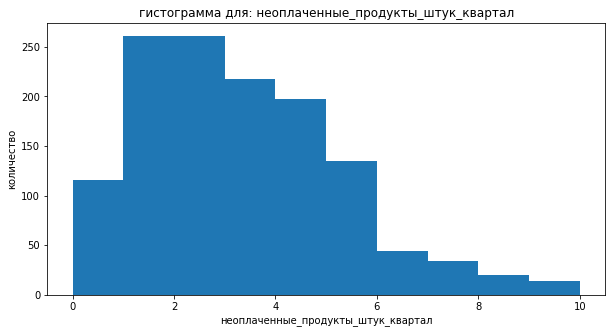

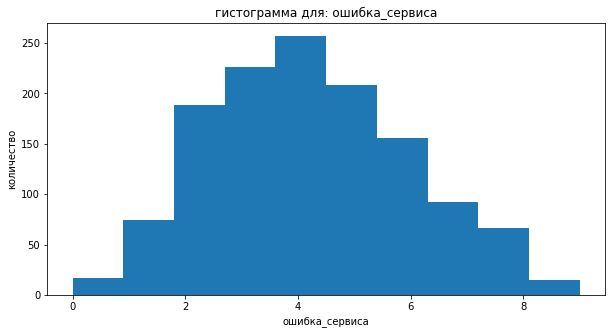

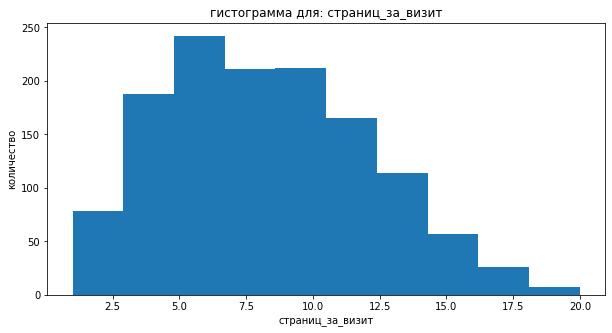

In [42]:
for i in df_market_num_columns:
    plt.figure(figsize=(10, 5))
    df_market_num_columns[i].plot(kind='hist')
    plt.title(f'гистограмма для: {i}')
    plt.xlabel(f'{i}')
    plt.ylabel('количество')
    plt.show();
    

**По графикам видно, что аномалий и выбросов нет**

In [43]:
df_market_money.describe()

,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


In [44]:
df_market_money

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
...,...,...,...
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0


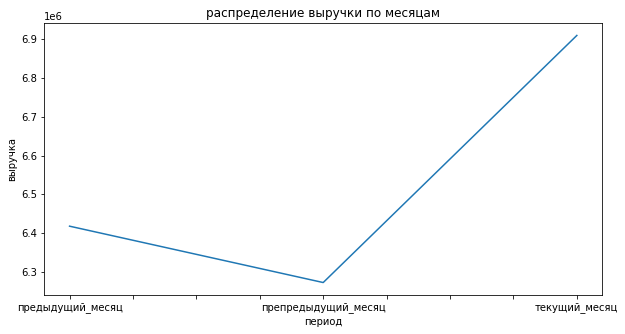

In [45]:
df_market_money.groupby('период')['выручка'].sum().plot(figsize=(10, 5))
plt.xlabel('период')
plt.ylabel('выручка')
plt.title('распределение выручки по месяцам')
plt.show();

**Видим резкий подьем выручки в текущем месяце по сравнению с предыдущим на 109%**

In [46]:
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [47]:
df_market_time.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


In [48]:
df_market_time.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


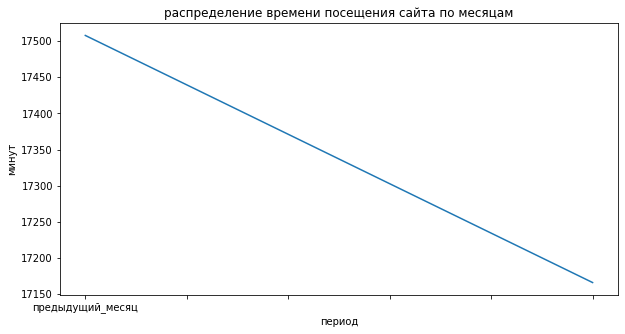

In [49]:
df_market_time.groupby('период')['минут'].sum().plot(figsize=(10, 5))
plt.xlabel('период')
plt.ylabel('минут')
plt.title('распределение времени посещения сайта по месяцам')
plt.show();

**А тут видим существенное снижение в текущем периоде по сравнению с предыдущим на 350 минут, что примерно составляет 6 часов**

In [50]:
df_money.isna().sum()

id         0
прибыль    0
dtype: int64

## Обьединение таблиц ##

**Возьмем по условию задачи клиентов, чья выручка не равна 0 и тех клиентов, кто активно покупает товары больше 3х месяцев.**

In [51]:
df_market_money_new = df_market_money.loc[df_market_money['выручка'] != 0]
df_market_money_new.sort_values(by='выручка')


,id,период,выручка
356,215466,текущий_месяц,2758.7
649,215564,предыдущий_месяц,2890.0
662,215568,предыдущий_месяц,2909.0
2485,216176,текущий_месяц,2952.2
392,215478,предыдущий_месяц,2960.0
...,...,...,...
2388,216144,текущий_месяц,7547.8
1481,215841,текущий_месяц,7557.0
262,215435,текущий_месяц,7605.3
435,215493,текущий_месяц,7799.4


In [52]:
customers = df_market.query('длительность > 90')

**Сагрегируем данные выручки по периодам и создадим таблицу с выручкой с новыми столбцами помесячной выручки**

In [53]:
df_market_money_new = df_market_money_new.pivot_table(index='id', columns='период', values='выручка').query('id in @customers["id"]')
df_market_money_new.columns = ['выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц']
df_market_money_new                                                  


,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц
id,,,
215348,NaN,NaN,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5
...,...,...,...
216643,3664.0,4704.0,4741.7
216644,4729.0,5299.0,5353.0
216645,5160.0,5334.0,5139.2


In [54]:
df_market_money_new = df_market_money_new.reset_index() # сбросим индексы методом reset_index, чтобы избавиться от двухэтажных индексов
df_market_money_new


,id,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц
0,215348,NaN,NaN,3293.1
1,215349,5216.0,4472.0,4971.6
2,215350,5457.5,4826.0,5058.4
3,215351,6158.0,4793.0,6610.4
4,215352,5807.5,4594.0,5872.5
...,...,...,...,...
1295,216643,3664.0,4704.0,4741.7
1296,216644,4729.0,5299.0,5353.0
1297,216645,5160.0,5334.0,5139.2
1298,216646,4923.0,4725.0,5224.6


**Избавимя от пропущенных значений методом dropna**

In [55]:
df_market_money_new = df_market_money_new.dropna(subset=['id', 'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц'])
df_market_money_new

,id,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц
1,215349,5216.0,4472.0,4971.6
2,215350,5457.5,4826.0,5058.4
3,215351,6158.0,4793.0,6610.4
4,215352,5807.5,4594.0,5872.5
5,215353,4738.5,5124.0,5388.5
...,...,...,...,...
1295,216643,3664.0,4704.0,4741.7
1296,216644,4729.0,5299.0,5353.0
1297,216645,5160.0,5334.0,5139.2
1298,216646,4923.0,4725.0,5224.6


**Контрольная проверка на пропуски**

In [56]:
df_market_money_new.isna().sum()

id                             0
выручка_препредыдущий_месяц    0
выручка_предыдущий_месяц       0
выручка_текущий_месяц          0
dtype: int64

In [57]:
df_market_time

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13
...,...,...,...
2595,216645,текущий_месяц,18
2596,216646,предыдущий_месяц,18
2597,216646,текущий_месяц,7
2598,216647,текущий_месяц,10


**Создадим по условию задачи новую таблицу по сгруппированным данным по времени попериодно**

In [58]:
df_market_time_new = df_market_time.pivot_table(index='id', columns='период', values='минут').query('id in @customers["id"]')
df_market_time_new.columns = ['минут_предыдущий_месяц', 'минут_текущий_месяц']
df_market_time_new.reset_index()

,id,минут_предыдущий_месяц,минут_текущий_месяц
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11
...,...,...,...
1295,216643,14,7
1296,216644,12,11
1297,216645,12,18
1298,216646,18,7


**Обьединим последовательно 3 таблицы с помощью метода merge по 'id'**

In [59]:
df_market_merged = df_market.merge(df_market_money_new, on='id')
df_market_merged = df_market_merged.merge(df_market_time_new, on='id')
df_market_merged

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1293,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1294,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1295,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


**Таблица готова для моделирования**

## Корреляционнй анализ ##

**Проведем корреляционный анализ всех признаков, кроме 'id', и посмотрим есть ли мультиколлериарность между признаками**

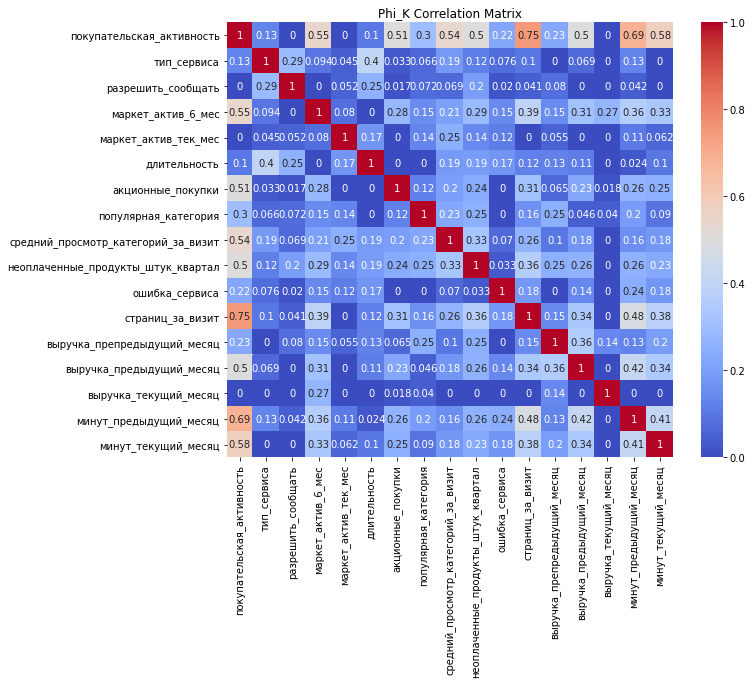

In [60]:
corr_matrix = df_market_merged.drop(['id'], axis=1).phik_matrix(interval_cols = ['маркет_актив_6_мес', 'маркет_актив_тек_меc', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц'])
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

**Сильной зависимости между входными признаками нет, поэтому можно сделать вывод, что мультиколлиреарности нет.**

**Создадим новый столбец 'покупателькая_активность со знаениями 1-'снизилась' и со значением 0 - 'прежний уровень', c помощью lambda функции**

In [61]:
df_market_merged.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [62]:
le = LabelEncoder()
df_market_merged_le = df_market_merged.copy()
df_market_merged_le.loc[:, 'покупательская_активность'] = le.fit_transform(df_market_merged_le.loc[:, 'покупательская_активность'])
df_market_merged_le

print("Исходные классы:", df_market_merged_le['покупательская_активность'])



Исходные классы: 0       1
1       1
2       1
3       1
4       1
       ..
1292    0
1293    0
1294    0
1295    0
1296    0
Name: покупательская_активность, Length: 1297, dtype: int64


In [63]:
RANDOM_STATE = 42
TEST_SIZE=0.25
X_train, X_test, y_train, y_test = train_test_split(
df_market_merged.drop(['покупательская_активность', 'id'], axis=1), 
df_market_merged['покупательская_активность'],
random_state = RANDOM_STATE,
test_size = TEST_SIZE,
stratify=df_market_merged['покупательская_активность']
)


In [64]:
df_market_merged_le

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,1,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,1,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,216643,0,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1293,216644,0,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1294,216645,0,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1295,216646,0,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


In [65]:
ohe_columns = ['тип_сервиса', 'популярная_категория']
ord_columns = ['разрешить_сообщать']
num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес',
       'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'выручка_препредыдущий_месяц',
       'выручка_предыдущий_месяц', 'выручка_текущий_месяц',
       'минут_предыдущий_месяц', 'минут_текущий_месяц']


In [66]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
        )
    ]
)

In [1]:
ohe_pipe

NameError: name 'ohe_pipe' is not defined

In [68]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['премиум', 'стандарт']
                ],                                  
                handle_unknown = 'use_encoded_value',
                unknown_value=np.nan
            )
        ),       
        (
           'simpleImputer_after_ord', 
           SimpleImputer(missing_values=np.nan, strategy='most_frequent')      
        )
    ]
)

In [69]:
ord_pipe

Pipeline(steps=[('simpleImputer_before_ord',
                 SimpleImputer(strategy='most_frequent')),
                ('ord',
                 OrdinalEncoder(categories=[['премиум', 'стандарт']],
                                handle_unknown='use_encoded_value',
                                unknown_value=nan)),
                ('simpleImputer_after_ord',
                 SimpleImputer(strategy='most_frequent'))])

In [70]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
) 

In [71]:
data_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['тип_сервиса', 'популярная_категория']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('...
                                 ['разрешить_сообщать']),
                                ('num', StandardScaler(),
                                 ['маркет_актив_6_мес', 'маркет_актив_тек_мес',
                                  'длительность', 'акционные_покупки',
                                  'средний_просмотр_категорий_за_визит',
                                  'неоплаченные_продукты_штук_квартал',
                                  'ошибка_сервиса', 'страниц_за_визит',
                                  'выручка_препредыдущий_месяц',
                                  'выручка_предыдущий_месяц',
                                  'выручка_текущий_месяц',
                                  'минут_предыдущий_месяц',
                                  'минут_текущий_месяц'])])

In [72]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['тип_сервиса',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImput...
                                                   'маркет_актив_тек_мес',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит',
                                                   'выручка_препредыдущий_месяц',
                                                   'выручка_предыдущий_месяц',
                                                   'выручка_текущий_месяц',
                                                   'минут_предыдущий_месяц',
                                                   'минут_текущий_месяц'])])),
                ('models', DecisionTreeClassifier(random_state=42))])

In [73]:
param_grid = [
     {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 6),
        'models__max_features': range(2, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
     },
     {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
     },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE,
                                     solver='liblinear',
                                     penalty='l1')],
        'models__C': range(2, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
        
    }
]
randomized_search = RandomizedSearchCV(pipe_final,
                   param_grid,
                   cv=5,
                   random_state=RANDOM_STATE,
                   scoring='recall',
                    n_jobs=-1)
randomized_search.fit(X_train, y_train)
predictions = randomized_search.predict(X_test)
predictions

print(f'Лучшая модель:\n\n: {randomized_search.best_estimator_}')
print(f'лучшая метрика  модели: {randomized_search.best_score_}')
print(f'Метрика recall_average: {recall_score(y_test, predictions, average="binary", pos_label=("Прежний уровень"))}')

Лучшая модель:

: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['тип_сервиса',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(st

**Будем использовать метрику recall, чтобы не упустить активных покупателей и следовательно упущенной выгоды**

**recall=0.93. Что близко к 1, тоесть к идеальному значению. Это выше, чем лучшая метрика на 0.7 пунктов и значит наша модель хорошо избегает ошибки второго рода FN**

In [74]:
df_market_merged

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1293,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1294,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1295,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


Text(0.5, 1.0, 'матрица ошибок')

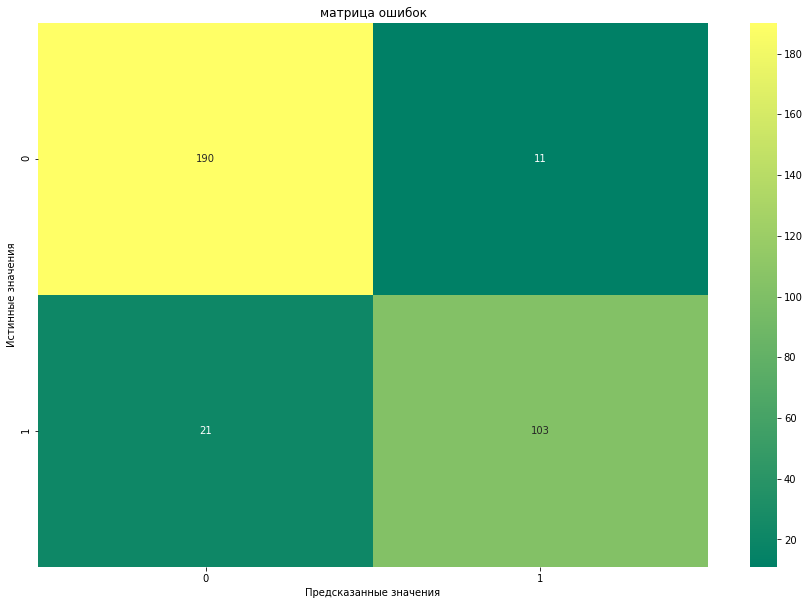

In [75]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='summer')
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.title('матрица ошибок')

**Для нас критинее будет ошибка второго рода, тоесть чем меньше будет ошибка FN, тем меньше мы упустим потенциально активных покупателей, и следовательно получим больше прибыли. По матрице ошибок можно сделать вывод, что модель допускает ошибку второго рода или FalseNegative всего в 21 случаях**

**По матрице ошибок ошибки FN и FP очень малы. Ложноотрицательная ошибка или ошибка второго рода вообще равна 21. Что говорит о высоком качестве модели и что модель пачти не ошибается. При этом ошибка первого рода или FalsePositive также очень маленькая, модель ошибается всего в 11 случаях.**

In [76]:
X_test_new = randomized_search.best_estimator_['preprocessor'].transform(X_test)
X_test_new = pd.DataFrame(X_test_new, columns=randomized_search.best_estimator_['preprocessor'].get_feature_names_out())
X_train_new = randomized_search.best_estimator_['preprocessor'].transform(X_train)
explainer = shap.KernelExplainer(randomized_search.best_estimator_['models'].predict_proba, X_train_new, link='logit')
shap_values = explainer(X_test_new)





Using 972 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/325 [00:00<?, ?it/s]

In [77]:
shap_values.values[:, :, -1]


array([[ 0.03239903,  0.01923635,  0.01247012, ...,  0.        ,
        -0.15556152, -0.51360774],
       [-0.07964943,  0.01942748,  0.01207087, ...,  0.        ,
         0.18959924,  0.40607116],
       [-0.0812051 , -0.09307368,  0.01221426, ..., -0.00191404,
        -0.46728716, -0.06095736],
       ...,
       [ 0.03323866,  0.01909169,  0.009134  , ...,  0.00282868,
         0.39796951,  0.33341614],
       [ 0.0322822 , -0.09406977,  0.01209894, ...,  0.        ,
         0.07117708,  0.24264038],
       [-0.08214995,  0.01954936,  0.01170123, ...,  0.        ,
         0.94152549,  0.58271917]])

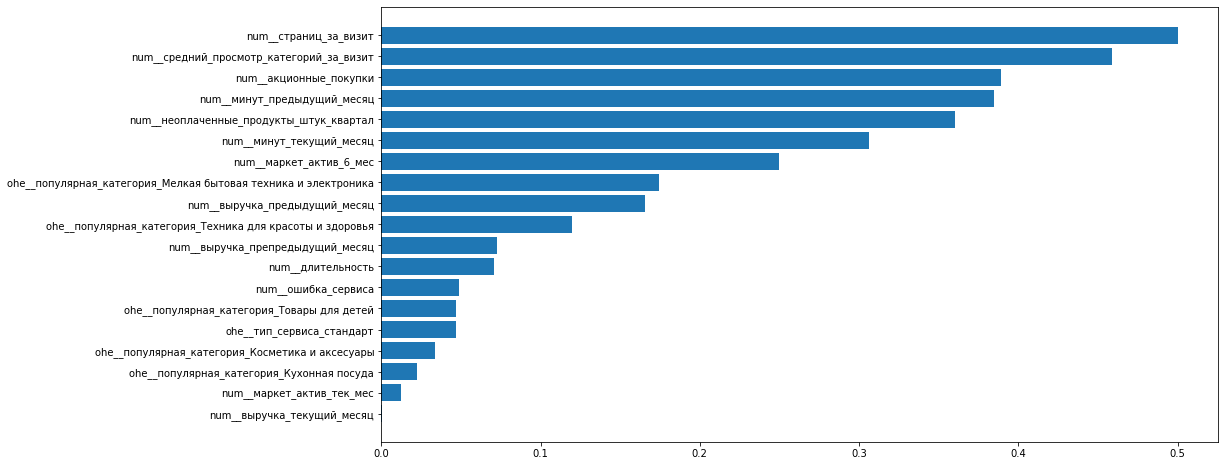

In [78]:
df_shap = pd.DataFrame(shap_values[:, :, -1].values, columns=randomized_search.best_estimator_['preprocessor'].get_feature_names_out())
for column in df_shap.columns:
    df_shap[column] = df_shap[column].abs()
df_mean = df_shap.mean().reset_index()
df_mean.columns = ['признак', 'Shap-значение']
df_mean = df_mean.sort_values(by='Shap-значение')

plt.figure(figsize=(15, 8))
plt.barh(df_mean['признак'], df_mean['Shap-значение'])
plt.show();
    

**По графику значенй SHAP видно, что наиболее важные признаки, влияющие на целевой признак, это средний просмотр страниц за визит и средний просмотр категорий за визит. Возьмем эти 2 признака относительно крупного сегмента прибыльности. Это и будет выделенным сегментом. Построим boxplot для наглядности**

**Построили график влияния каждого отдельного признака на покупательскую активность. Видим, что больше всего влияет на целевой признак(покупательская активность) - количество страниц за визит и средний просмотр категорий за визит. Далее идут признаки с количество акционных покупок и колиество проведенных минут на сайте за предыдущий месяц**

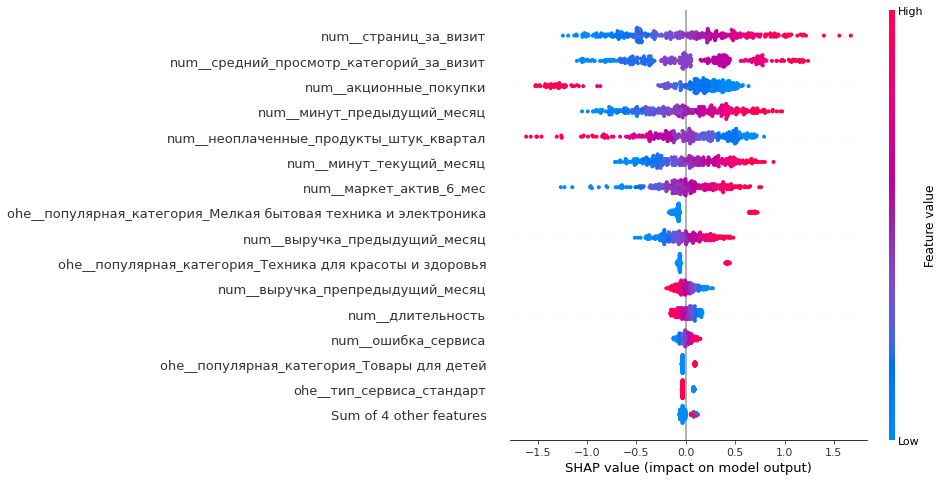

In [79]:
shap.plots.beeswarm(shap_values[:,:,0], max_display=16)

**Возьмем первые 2 верхних признака. По признакам видно, что чем больше у них значения(чем краснее точки), тем больше у них Shap значения и тем больше они склоняют модель отнести обьекты к классу 1. По акционным покупкам противоположная ситуация. Тоесть чем больше значения признака, тем меньше его shap значения и тем больше признак склоняет модель отнести обьекты к классу 0**

## Сегментация покупателей ##

**Для сегментации покупателей будем использовать данные о прибыльности клиентов и данные моделирования**

In [80]:
df_money

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
...,...,...
1295,216643,4.44
1296,216644,6.11
1297,216645,3.29
1298,216646,4.03


In [81]:
df_money.head()
df_money.describe()

,id,прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


**разделим покупателей на сегменты по величине прибыли, для этого будем использовать функцию одной строки**

In [82]:
def profit(row):
    if 0 < row['прибыль'] < 1:
        return 'малый сегмент'
    if 1 <  row['прибыль'] < 4:
        return 'средний сегмент'
    else:
        
        
        return 'крупный сегмент'
df_money['сегмент'] = df_money.apply(profit, axis=1)

        

In [83]:
df_money

,id,прибыль,сегмент
0,215348,0.98,малый сегмент
1,215349,4.16,крупный сегмент
2,215350,3.13,средний сегмент
3,215351,4.87,крупный сегмент
4,215352,4.21,крупный сегмент
...,...,...,...
1295,216643,4.44,крупный сегмент
1296,216644,6.11,крупный сегмент
1297,216645,3.29,средний сегмент
1298,216646,4.03,крупный сегмент


In [84]:
df_money['сегмент'].unique()

array(['малый сегмент', 'крупный сегмент', 'средний сегмент'],
      dtype=object)

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>
    
Исправь ошибку пожалуйста. После этого проект будет принят.    
</div>

**клиентов с прибылью крупного сегмента 62%, среднего 38%. Малого - 0%**

**Возьмем для анализа крпный сегмент. Он больше по количеству и во вторых он крупные клиенты более выгодны. Будем учитывать данные моделирования**

In [85]:
df_market_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   покупательская_активность            1297 non-null   object 
 2   тип_сервиса                          1297 non-null   object 
 3   разрешить_сообщать                   1297 non-null   object 
 4   маркет_актив_6_мес                   1297 non-null   float64
 5   маркет_актив_тек_мес                 1297 non-null   int64  
 6   длительность                         1297 non-null   int64  
 7   акционные_покупки                    1297 non-null   float64
 8   популярная_категория                 1297 non-null   object 
 9   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  ошибка_сервиса                

In [86]:
df_market_merged

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1293,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1294,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1295,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


<AxesSubplot:title={'center':'распределение прибыли по сегментам'}>

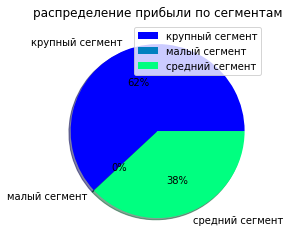

In [87]:
df_market_merged_grouped = df_money.groupby('сегмент')['прибыль'].sum()
df_market_merged_grouped.plot(kind='pie', legend=True, label='', autopct='%1.0f%%', cmap='winter', shadow=True, title='распределение прибыли по сегментам')


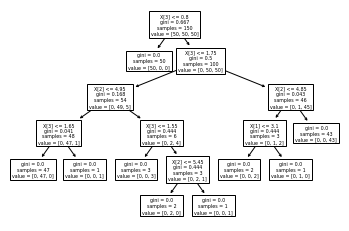

In [88]:
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()
x = iris.data
y = iris.target
clf.fit(x, y)
tree.plot_tree(clf)
plt.show()

In [89]:
df_market_merged['популярная_категория'].value_counts()

Товары для детей                        329
Домашний текстиль                       250
Косметика и аксесуары                   223
Техника для красоты и здоровья          183
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64

In [90]:
df_money

,id,прибыль,сегмент
0,215348,0.98,малый сегмент
1,215349,4.16,крупный сегмент
2,215350,3.13,средний сегмент
3,215351,4.87,крупный сегмент
4,215352,4.21,крупный сегмент
...,...,...,...
1295,216643,4.44,крупный сегмент
1296,216644,6.11,крупный сегмент
1297,216645,3.29,средний сегмент
1298,216646,4.03,крупный сегмент


In [91]:
df_market_merged
df_market_merged = df_market_merged.merge(df_money, on='id')
df_market_merged

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,прибыль,сегмент
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,4.16,крупный сегмент
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,3.13,средний сегмент
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,4.87,крупный сегмент
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,4.21,крупный сегмент
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,3.95,средний сегмент
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7,4.44,крупный сегмент
1293,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11,6.11,крупный сегмент
1294,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18,3.29,средний сегмент
1295,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7,4.03,крупный сегмент


**Выделим сегмент с акционными покупками и с покупательской активностью = 'снизилась', посмотрим сколько прибыли они приносят и построим сводную таблицу методом pivot_table и сравним с сегментом акционных покупок, но со значением покупательской активности = прежний уровень. Построиим графики для наглядности**

In [92]:
df_market_merged_grouped = df_market_merged.groupby('покупательская_активность')['акционные_покупки','прибыль'].sum()
df_market_merged_grouped.reset_index()


,покупательская_активность,акционные_покупки,прибыль
0,Прежний уровень,191.17,3204.45
1,Снизилась,224.58,1980.45


array([<AxesSubplot:>], dtype=object)

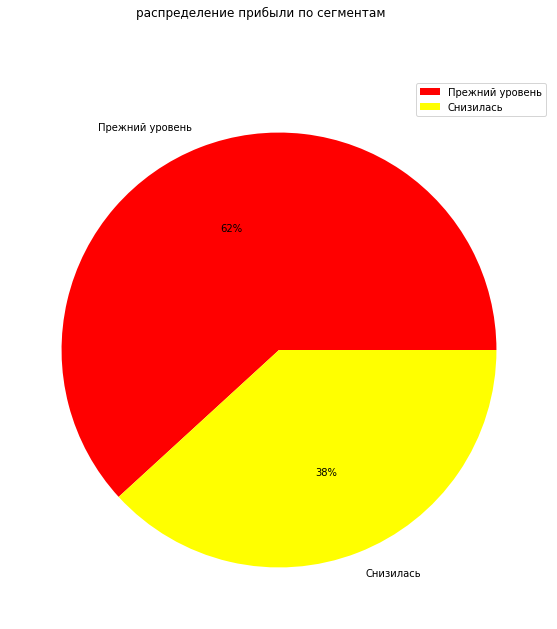

In [93]:
df_market_merged_grouped.groupby('покупательская_активность')['прибыль'].sum().plot(kind='pie', subplots=True, cmap='autumn', label='', figsize=(20, 10), legend=True, autopct='%1.0f%%', title='распределение прибыли по сегментам')

**Видим, что по нашему выбранному сегменту с покупательской способностью = 'снизилась', доля прибыли составляет 38% по сравнению с сегментом, где покупательская способность = 'прежний уровень'.**

**Построим гистограммы для количественных переменных**

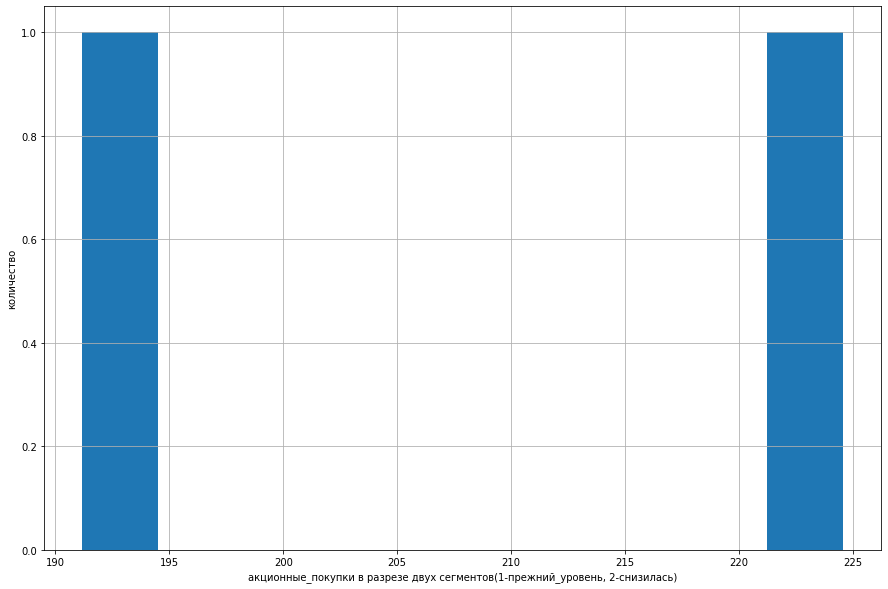

In [94]:
df_market_merged_grouped.groupby('покупательская_активность')['акционные_покупки'].sum().plot(kind='hist', figsize=(15,10), grid=True)
plt.xlabel('акционные_покупки в разрезе двух сегментов(1-прежний_уровень, 2-снизилась)')
plt.ylabel('количество')
plt.show();

**Видим, что больше акционных покупок в нашем сегменте со значением покупательской активности = 'снизилась'(225 против 195)**

**Из чего можно сделать вывод, то нужно подумать о снижении количества будущих акций для клиентов нашего сегмента по сравнению с сегментом, где покупательская активность на прежнем уровне**

**Для удержания клиентов данного сегмента, учитывая данные моделирования, рекомендую ввести больше акций на покупки и сделать дополнительные email и смс рассылки а также для увеличения времени пребывания на сайте и для увеличения  среднего просмотора категорий за визит, предлагать клиенту на сайте дополнительные товары к основному и сопуствующие товары. Это в итоге приведет к увелиению будущей покупательской активности**

## Общий вывод ##

**Задача исследования - Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
Используя данные модели и данные о прибьльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.**

**Для решения данной задачи мы провели несколько этапов исследования:\ 
1 Описание проекта\
1.1 Изучили общую информацию о данных\
1.2 Привели названия колонок к надлежащему виду\
2 Предобработка данных\
2.1 Проверили наличие пропусков в данных\
2.2 Привели данные к нужному типу там, где это нужно было сделать\
2.3 Изучили аномалии и ошибки в данных. Исправили аномальное значение выручки в таблице df_market_money\
2.4 Провели проверку на дубликаты\
3 Исследовательский анализ данных\
Проанализировали каждую таблицу с помощью метода describe, посмотрев на макс и мин значения, а также на средние значения\ столбцов\
4 Обьединили 2 таблицы: с основными данными и с таблицей о выручке, создав предварительно новые стобцы с помесячной выручкой\
5 Провели корреляционный анализ данных с помощью матрицы корреляции и не выявили мультиколлиреарности между признаками\
6 Построили пайплайны. Обучили четыре модели c гиперпараметрами: KNN - модель ближайших соседей, логистическую регрессию,\
модель опорных векторов и дерево решений. Нашли лучшую модель -логистическую регрессию и лучшую метрику с помощью randomizedsearchCV\
7 Провели анализ важности признаков и выявили 4 главных признака, больше всего влияющих на целевой признак. Это\ 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'страниц_за_визит', 'минут_предыдущий_месяц\
8 Провели сегментацию покупателей, определили подходящий сегмент для анализа и провели графическое и аналитическое\ исследование. Рекомендация заказчику - Для клиентов выбранного сегмента уменьшить количество акционных предложений.
9 Написали общий вывод**